In [2]:
import psycopg2
import os
import pandas as pd
from sqlalchemy import create_engine

# Set up connection parameters from environment variables
dbname = os.environ.get('DBNAME')
user = os.environ.get('DBUSER')
password = os.environ.get('DBPASS')
host = os.environ.get('DBHOST')
port = os.environ.get('DBPORT')

# Connect to the PostgreSQL database
conn_str = f'postgresql://{user}:{password}@{host}:{port}/{dbname}'
engine = create_engine(conn_str)

# SQL query
query = '''
WITH MonthlyAverages AS (
  SELECT
    DATE_TRUNC('month', date) + INTERVAL '1 month' - INTERVAL '1 day' AS date,
    AVG((lower_bound + upper_bound) / 2.0) AS value
  FROM
    targetranges
  GROUP BY
    DATE_TRUNC('month', date)
)
SELECT
  (date + INTERVAL '1 day')::date AS date,
  value
FROM
  MonthlyAverages

UNION ALL

SELECT
  '2000-01-01'::date AS report_date,
  (SELECT (lower_bound + upper_bound) / 2.0
   FROM targetranges
   ORDER BY date ASC
   LIMIT 1) AS value
ORDER BY
  date;
'''

# Read the data into a Pandas DataFrame
SNB_old = pd.read_sql_query(query, engine)

# Drop the last row from the DataFrame
SNB_old = SNB_old[:-1]

# Close the connection
engine.dispose()

# Show the resulting DataFrame
print(SNB_old)


           date     value
0    2000-01-01  1.750000
1    2000-02-01  1.750000
2    2000-03-01  2.202381
3    2000-04-01  2.478261
4    2000-05-01  3.000000
..          ...       ...
229  2019-02-01 -0.750000
230  2019-03-01 -0.750000
231  2019-04-01 -0.750000
232  2019-05-01 -0.750000
233  2019-06-01 -0.750000

[234 rows x 2 columns]


In [3]:
import psycopg2
import os
import pandas as pd
from sqlalchemy import create_engine
from pandas.tseries.offsets import DateOffset

# Set up connection parameters from environment variables
dbname = os.environ.get('DBNAME')
user = os.environ.get('DBUSER')
password = os.environ.get('DBPASS')
host = os.environ.get('DBHOST')
port = os.environ.get('DBPORT')

# Connect to the PostgreSQL database
conn_str = f'postgresql://{user}:{password}@{host}:{port}/{dbname}'
engine = create_engine(conn_str)

# SQL query to select date and value from the targetrates table
query = '''
SELECT date, value FROM targetrates;
'''

# Read the data into a Pandas DataFrame
SNB_new = pd.read_sql_query(query, engine)

# Index the dates forward by one month to the first of the next month
SNB_new['date'] = pd.to_datetime(SNB_new['date']) + DateOffset(months=1)
SNB_new['date'] = SNB_new['date'].apply(lambda d: d.replace(day=1))

# Close the connection
engine.dispose()

# Print the resulting DataFrame
print(SNB_new)


         date  value
0  2019-07-01  -0.75
1  2019-08-01  -0.75
2  2019-09-01  -0.75
3  2019-10-01  -0.75
4  2019-11-01  -0.75
5  2019-12-01  -0.75
6  2020-01-01  -0.75
7  2020-02-01  -0.75
8  2020-03-01  -0.75
9  2020-04-01  -0.75
10 2020-05-01  -0.75
11 2020-06-01  -0.75
12 2020-07-01  -0.75
13 2020-08-01  -0.75
14 2020-09-01  -0.75
15 2020-10-01  -0.75
16 2020-11-01  -0.75
17 2020-12-01  -0.75
18 2021-01-01  -0.75
19 2021-02-01  -0.75
20 2021-03-01  -0.75
21 2021-04-01  -0.75
22 2021-05-01  -0.75
23 2021-06-01  -0.75
24 2021-07-01  -0.75
25 2021-08-01  -0.75
26 2021-09-01  -0.75
27 2021-10-01  -0.75
28 2021-11-01  -0.75
29 2021-12-01  -0.75
30 2022-01-01  -0.75
31 2022-02-01  -0.75
32 2022-03-01  -0.75
33 2022-04-01  -0.75
34 2022-05-01  -0.75
35 2022-06-01  -0.75
36 2022-07-01  -0.25
37 2022-08-01  -0.25
38 2022-09-01  -0.25
39 2022-10-01   0.50
40 2022-11-01   0.50
41 2022-12-01   0.50
42 2023-01-01   1.00
43 2023-02-01   1.00
44 2023-03-01   1.00
45 2023-04-01   1.50
46 2023-05-01

In [4]:
import pandas as pd

# Assuming SNB_old and SNB_new are already defined and have the 'date' and 'value' columns

# Convert the 'date' columns in both DataFrames to pandas datetime format
SNB_old['date'] = pd.to_datetime(SNB_old['date'])
SNB_new['date'] = pd.to_datetime(SNB_new['date'])

# Merge SNB_old and SNB_new DataFrames
SNB_policy = pd.concat([SNB_old, SNB_new])

# Sort by date
SNB_policy.sort_values(by='date', inplace=True)

# Remove duplicates, keeping the first occurrence by default
SNB_policy.drop_duplicates(subset='date', keep='first', inplace=True)

# Print the resulting DataFrame
print(SNB_policy)


         date     value
0  2000-01-01  1.750000
1  2000-02-01  1.750000
2  2000-03-01  2.202381
3  2000-04-01  2.478261
4  2000-05-01  3.000000
..        ...       ...
47 2023-06-01  1.500000
48 2023-07-01  1.750000
49 2023-08-01  1.750000
50 2023-09-01  1.750000
51 2023-10-01  1.750000

[286 rows x 2 columns]


In [5]:
import pandas as pd
from sqlalchemy import create_engine

# Set up connection parameters from environment variables
dbname = os.environ.get('DBNAME')
user = os.environ.get('DBUSER')
password = os.environ.get('DBPASS')
host = os.environ.get('DBHOST')
port = os.environ.get('DBPORT')

# Connect to the PostgreSQL database
conn_str = f'postgresql://{user}:{password}@{host}:{port}/{dbname}'
engine = create_engine(conn_str)

# SQL query to select date and value from the depositrates table
query = '''
SELECT date, value FROM depositrates;
'''

# Read the data into a Pandas DataFrame
SNB_deposit = pd.read_sql_query(query, engine)

# Convert the 'date' column to pandas datetime format and index forward by one month to the first of the next month
SNB_deposit['date'] = pd.to_datetime(SNB_deposit['date']) + pd.offsets.MonthBegin(1)

# Close the connection
engine.dispose()

# Print the resulting DataFrame
print(SNB_deposit)


          date     value
0   2000-01-01  1.190000
1   2000-02-01  1.190000
2   2000-03-01  1.270000
3   2000-04-01  1.350000
4   2000-05-01  1.350000
..         ...       ...
280 2023-05-01  0.334940
281 2023-06-01  0.460714
282 2023-07-01  0.526190
283 2023-08-01  0.597059
284 2023-09-01  0.656765

[285 rows x 2 columns]


In [28]:
import pandas as pd

# Assuming SNB_policy and SNB_deposit are already defined DataFrames with a 'date' column

# Merge SNB_policy and SNB_deposit on the 'date' column
SNB_data = pd.merge(SNB_policy[['date', 'value']], SNB_deposit[['date', 'value']], on='date', how='left')

# Rename the columns appropriately
SNB_data.rename(columns={'value_x': 'policy', 'value_y': 'deposit'}, inplace=True)

# Print the resulting DataFrame
print(SNB_data)


          date    policy   deposit
0   2000-01-01  1.750000  1.190000
1   2000-02-01  1.750000  1.190000
2   2000-03-01  2.202381  1.270000
3   2000-04-01  2.478261  1.350000
4   2000-05-01  3.000000  1.350000
..         ...       ...       ...
281 2023-06-01  1.500000  0.460714
282 2023-07-01  1.750000  0.526190
283 2023-08-01  1.750000  0.597059
284 2023-09-01  1.750000  0.656765
285 2023-10-01  1.750000       NaN

[286 rows x 3 columns]


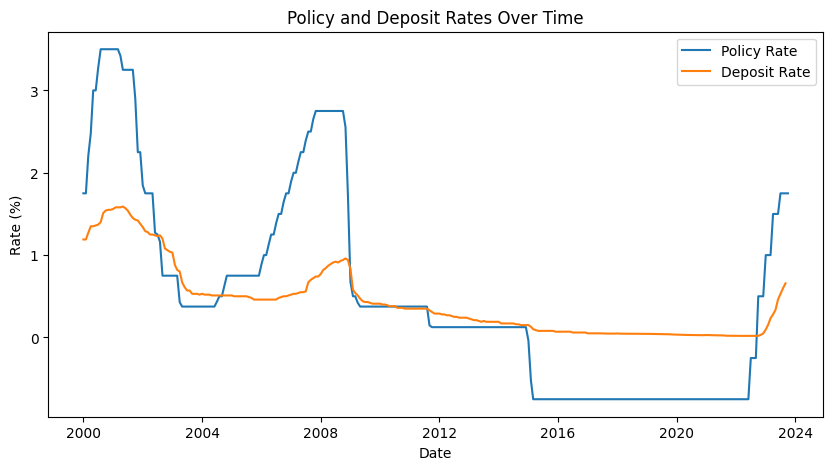

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Assuming SNB_data is already defined with 'date', 'policy', and 'deposit' columns

# Convert 'date' to datetime if it's not already in that format
SNB_data['date'] = pd.to_datetime(SNB_data['date'])

# Set 'date' as the index
SNB_data.set_index('date', inplace=True)

# Plotting the line chart
plt.figure(figsize=(10, 5))
plt.plot(SNB_data.index, SNB_data['policy'], label='Policy Rate')
plt.plot(SNB_data.index, SNB_data['deposit'], label='Deposit Rate')

# Adding title and labels
plt.title('Policy and Deposit Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Rate (%)')

# Adding legend
plt.legend()

# Check if the directory exists and create it if not
output_dir = '../reports/figures/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the plot as a PDF file in the specified directory
pdf_file_path = os.path.join(output_dir, 'Rates_over_time.pdf')
plt.savefig(pdf_file_path, format='pdf')

# Display the plot
plt.show()
